In [1]:
using Polynomials
using QuadGK
using Plots
using DataFrames

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)


In [2]:
function LegendrePoly(n)
    if n==0
        return Polynomial([1])
    end
    if n==1
        return Polynomial([0,1])
    end
    m = zeros(Float64,n+1,n+1)
    m[1, 1] = 1
    m[2, 2] = 1
    
    for i in 3:n+1
        for j in 1:n
            m[i, j+1] += (2*i-3) / (i-1) * m[i-1,j]
            m[i,j] -= (i-2)/(i-1) * m[i-2,j]
        end
    end    

    coefs = [m[n+1,j] for j in 1:n+1]
    result = Polynomial(coefs)
end

LegendrePoly (generic function with 1 method)

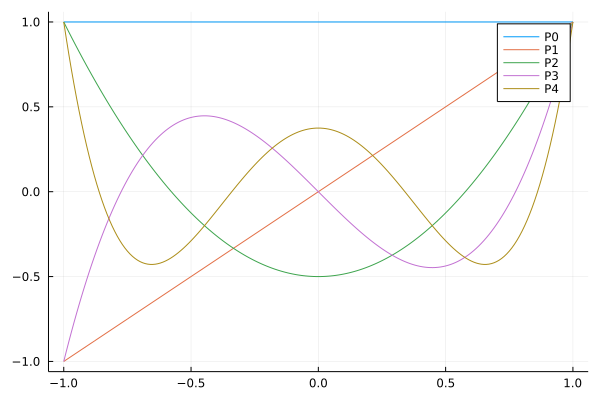

In [3]:
args = -1:0.01:1
labels = ["P1", "P2", "P3", "P4"]

plot(args, [1 for x in args], label="P0")

for i in 1:1:4
    polynomial = LegendrePoly(i)
    values = [polynomial(x) for x in args]
    plot!(args, values, label=labels[i])
end
plot!()

In [4]:
for i in 1:4
    println("   gauss: ",gauss(Float64,i)[1])
    println("legendre: ",sort(roots(LegendrePoly(i))))
    println("----------------------------------------------------")
end

   gauss: [0.0]
legendre: [0.0]
----------------------------------------------------
   gauss: [-0.5773502691896258, 0.5773502691896258]
legendre: [-0.5773502691896258, 0.5773502691896256]
----------------------------------------------------
   gauss: [-0.7745966692414834, 0.0, 0.7745966692414834]
legendre: [-0.7745966692414834, 0.0, 0.7745966692414835]
----------------------------------------------------
   gauss: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
legendre: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
----------------------------------------------------


#### Podstawowe twierdzenie kwadratur Gaussa

Odcięte ***x_i***
n-punktowej kwadratury Gaussa z funkcją ważącą ***w(x)*** w ***[a,b]*** są zerami wielomianu ortogonalnego ***f_n(x)***
dla tego samego przedziału i tej samej funkcji ważącej.

### Zadanie 2 (1p)

Napisz funkcję, która dla podanej liczby punktów Gaussa 𝑘
oraz funkcji 𝑓 policzy ∫1−1𝑓𝑑𝑥
metodą używającą funkcji:

    gauss(k)

oraz sumy

    sum(a .* f.(xp)) 

- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna,
- podaj związek z twierdzeniem o stopniu dokładności kwadratury Gaussa 

In [5]:
function sumaricGauss(f, n)
    xp, a = gauss(n)
    return sum(a .* f.(xp))
end

sumaricGauss (generic function with 1 method)

In [6]:
test_polynomials = [[if j != i  0 else i end for i in 1:j] for j in 1:10]

dataframe = DataFrame(quadDegree = Int64[], polyDegree = Int64[], gaussValue = Float64[], expValue = Float64[])

for poly in test_polynomials
    pn = Polynomial(poly)
    polyDegree = length(poly) - 1
    push!(dataframe, [3 polyDegree sumaricGauss(pn, 3) 1^length(poly) - ((-1)^length(poly))])
end

dataframe

,quadDegree,polyDegree,gaussValue,expValue
,Int64,Int64,Float64,Float64
1,3,0,2.0,2.0
2,3,1,0.0,0.0
3,3,2,2.0,2.0
4,3,3,0.0,0.0
5,3,4,2.0,2.0
6,3,5,0.0,0.0
7,3,6,1.68,2.0
8,3,7,0.0,0.0
9,3,8,1.296,2.0


#### Twierdzenie o stopniu dokładności kwadratury Gaussa

Kwadratura ma stopien dokladnosci ***2n - 1*** dla ***n*** punktowej kwadratury.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [7]:
function sumaricIntegralGauss(fun, a, b, n)
    xp, q = gauss(n)
#     println(x)
    xp = (b-a)/2 *xp .+ (b+a)/2
#     println(x)
    value = (b-a)/2 * sum(fun.(xp) .* q)
    return value
end

sumaricIntegralGauss (generic function with 1 method)

In [8]:
println("expected value: 8.(6)")
for i in 1:5
    println("dla ",i," pkt kwadratury : ", 
        sumaricIntegralGauss(x -> x^2, 1, 3, i))
end

expected value: 8.(6)
dla 1 pkt kwadratury : 8.0
dla 2 pkt kwadratury : 8.666666666666664
dla 3 pkt kwadratury : 8.666666666666664
dla 4 pkt kwadratury : 8.666666666666668
dla 5 pkt kwadratury : 8.666666666666664


In [9]:
println("expected value: ", 2)
for i in 1:5
    println("dla ",i," pkt kwadratury : ",
        sumaricIntegralGauss(sin, 0, pi, i))
end

expected value: 2
dla 1 pkt kwadratury : 3.141592653589793
dla 2 pkt kwadratury : 1.9358195746511362
dla 3 pkt kwadratury : 2.0013889136077427
dla 4 pkt kwadratury : 1.9999842284577216
dla 5 pkt kwadratury : 2.0000001102844713


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [10]:
function stdDistribution(x)
    return 1/sqrt(2*pi) * exp(-x^2 / 2)
end

stdDistribution (generic function with 1 method)

In [11]:
value, error = quadgk(stdDistribution, -Inf, Inf)

(1.0000000000032583, 1.4395584885993386e-8)

### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [12]:
function rectangleIntegral(f, a, b, n)
    value = 0
    h = (b-a)/n
    for i in 1:n
       value += f(a + (i-1)*h + h/2) * h
    end
    return value
end


function trapezeIntegral(f, a, b, n)
    value = 0
    h = (b-a)/n
    for i in 1:n
       value += (f(a + (i-1) * h) + f(a + i * h)) * h
    end
    return value / 2
end


function SimpsonIntegral(f, a, b, n)
    value = 0
    h = (b-a)/n
    x = a
    for i in 1:n
       value += f(x) + 4 * f((x + (x + h)) / 2) + f(x + h)
       x += h
    end
    return value * h / 6
end

SimpsonIntegral (generic function with 1 method)

In [13]:
errorframe = DataFrame(n = Int64[], method = String[], error = Float64[])

for i = 1:1:100
    push!(errorframe, [i "rectangle" abs(rectangleIntegral(exp, 0, 3, i) - (exp(3) - 1))])
    push!(errorframe, [i "trapeze" abs(trapezeIntegral(exp, 0, 3, i) - (exp(3) - 1))])
    push!(errorframe, [i "Simpson" abs(SimpsonIntegral(exp, 0, 3, i) - (exp(3) - 1))])
end
errorframe

,n,method,error
,Int64,String,Float64
1,1,rectangle,5.64047
2,1,trapeze,12.5428
3,1,Simpson,0.42061
4,2,rectangle,1.67843
5,2,trapeze,3.45115
6,2,Simpson,0.0314277
7,3,rectangle,0.772633
8,3,trapeze,1.56457
9,3,Simpson,0.00643474


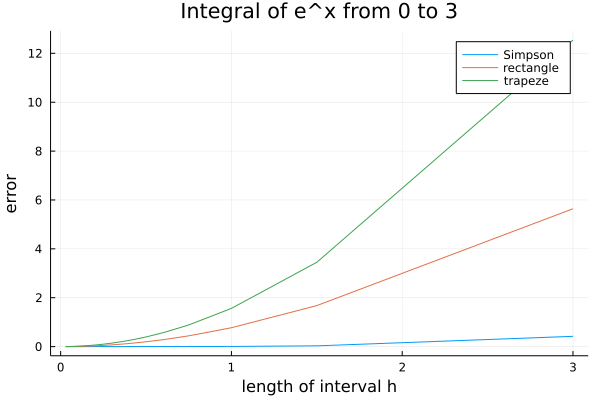

In [14]:
plot(3 ./ errorframe.n, errorframe.error, group=errorframe.method, title="Integral of e^x from 0 to 3", 
    ylabel="error", xlabel="length of interval h")

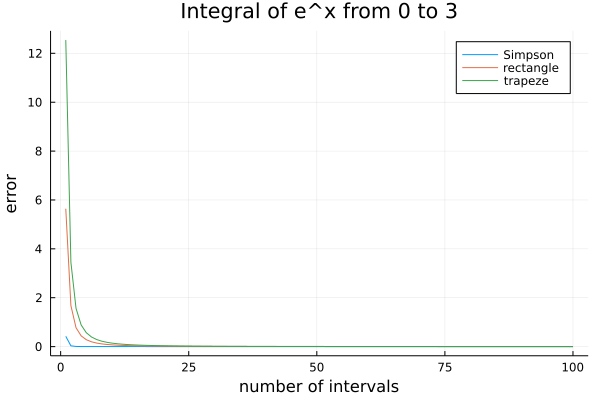

In [15]:
plot(errorframe.n, errorframe.error, group=errorframe.method, title="Integral of e^x from 0 to 3", 
    ylabel="error", xlabel="number of intervals")

In [16]:
errorframe = DataFrame(n = Int64[], method = String[], error = Float64[])

for i = 1:1:100
    push!(errorframe, [i "rectangle" abs(rectangleIntegral(sin, 0, 2*pi, i) - (-cos(2*pi)+cos(0)))])
    push!(errorframe, [i "trapeze" abs(trapezeIntegral(sin, 0, 2*pi, i) - (-cos(2*pi)+cos(0)))])
    push!(errorframe, [i "Simpson" abs(SimpsonIntegral(sin, 0, 2*pi, i) - (-cos(2*pi)+cos(0)))])
end
errorframe

,n,method,error
,Int64,String,Float64
1,1,rectangle,7.69468e-16
2,1,trapeze,7.69468e-16
3,1,Simpson,2.56489e-16
4,2,rectangle,0.0
5,2,trapeze,0.0
6,2,Simpson,0.0
7,3,rectangle,6.66134e-16
8,3,trapeze,2.22045e-16
9,3,Simpson,3.10033e-16


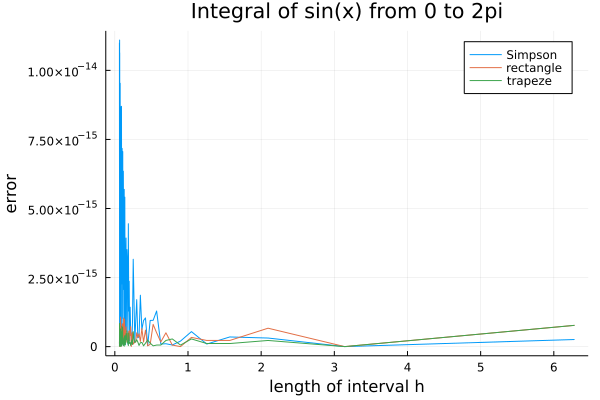

In [17]:
plot(2* pi ./ errorframe.n, errorframe.error, group=errorframe.method, title="Integral of sin(x) from 0 to 2pi", 
    ylabel="error", xlabel="length of interval h")

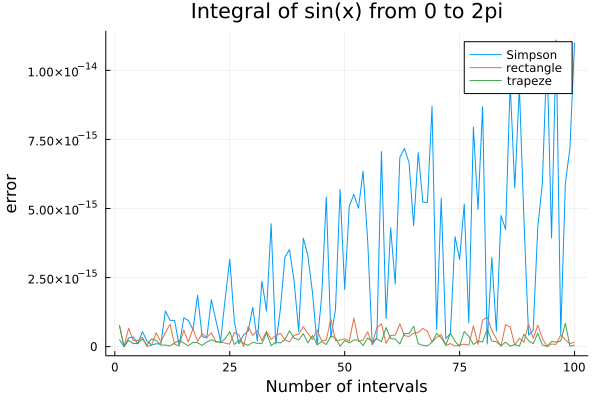

In [18]:
plot( errorframe.n, errorframe.error, group=errorframe.method, title="Integral of sin(x) from 0 to 2pi", 
    ylabel="error", xlabel="Number of intervals")